## 1. Data Preparation 

In [1]:
# Dependencies and Setup 
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
import requests
import time
import sys
import calendar
from scipy.stats import linregress
import statsmodels.api as sm
import seaborn; seaborn.set()
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [2]:
# Loading our CSV file containing data for 2014-2019
file_1 = "Data_files/Counts_of_Deaths_by_Select_Causes__2014-2019.csv"

# Read the data back into the dataframe from the csv file
df1 = pd.read_csv(file_1)

df1.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Other Diseases of Respiratory System,"Nephritis, Nephrotic Syndrome, and Nephrosis","Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified",Diseases of Heart,Cerebrovascular Diseases,Accidents (Unintentional Injuries),Motor Vehicle Accidents,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,3466,4600,2815,58229,12074,11461,2572,3320,1213,4026
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,3797,4979,3005,63190,13576,12311,2754,3618,1437,4354
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,3705,4645,2755,58049,12968,12559,2734,3720,1499,4631
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,4083,4818,2769,61650,13595,14520,3034,3709,1726,6233
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,4603,5346,3138,67024,14653,14748,3010,3966,1674,5659


In [3]:
# Loading our CSV file containing data for 2020-2023
file_2 = "Data_files/Counts_of_Deaths_by_Select_Causes__2020-2023.csv"

# Read the data back into the dataframe from the csv file
data_2 = pd.read_csv(file_2)
#data_2.head()

# Standardizing the two non-matching attribute names across both source data files
#data_2["Nephritis, Nephrotic Syndrome and Nephrosis"] = data_2["Nephritis, Nephrotic Syndrome, and Nephrosis"]
df2 = data_2.rename(columns = {"Nephritis, Nephrotic Syndrome and Nephrosis":"Nephritis, Nephrotic Syndrome, and Nephrosis", "Symptoms, Signs and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified": "Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified"}) 

df2.head()

,Data As Of,Start Date,End Date,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,...,Intentional Self-Harm (Suicide),Assault (Homicide),Drug Overdose,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,09/27/2023,01/01/2020,01/31/2020,United States,2020,1,264681,242914,3687,52635,...,4040.0,1708.0,6547.0,6,4,NaN,NaN,NaN,NaN,NaN
1,09/27/2023,02/01/2020,02/29/2020,United States,2020,2,244966,224343,3324,48764,...,3672.0,1471.0,6435.0,25,20,NaN,NaN,NaN,NaN,NaN
2,09/27/2023,03/01/2020,03/31/2020,United States,2020,3,269806,247634,3669,51640,...,3952.0,1693.0,7268.0,7175,6785,NaN,NaN,NaN,NaN,NaN
3,09/27/2023,04/01/2020,04/30/2020,United States,2020,4,322424,300780,3366,48773,...,3480.0,1756.0,7938.0,65553,62014,NaN,NaN,NaN,NaN,NaN
4,09/27/2023,05/01/2020,05/31/2020,United States,2020,5,280564,255489,3085,49012,...,3769.0,2067.0,9466.0,38330,35279,NaN,NaN,NaN,NaN,NaN


In [4]:
# Concatenating the two source data files
data = pd.concat([df1, df2], ignore_index=True)
data.head()

,Jurisdiction of Occurrence,Year,Month,All Cause,Natural Cause,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Influenza and Pneumonia,...,Data As Of,Start Date,End Date,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),flag_accid,flag_mva,flag_suic,flag_homic,flag_drugod
0,United States,2014,1,243298,226621,3944,51101,7344,8305,7929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,2015,1,265355,247269,4194,52346,8053,11638,10005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,2016,1,245823,227341,3846,51863,7392,10612,5295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,2017,1,262832,241918,4089,52120,7907,12018,6925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,2018,1,286744,265418,4502,52876,8674,13410,12164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Renaming column for simplification
data = data.rename(columns={"Symptoms, Signs, and Abnormal Clinical and Laboratory Findings, Not Elsewhere Classified":"Unclassified"})

# Removing the columns and rows that we don't want included in the analysis

# Dropping unecessary columns
data = data.drop(columns=["Jurisdiction of Occurrence","Start Date","End Date", "Data As Of", "flag_accid", "flag_mva", "flag_suic", "flag_homic", "flag_drugod"])


# Dropping non-chronic illness columns (but keeping Covid)
data = data.drop(columns=["All Cause", "Natural Cause", "Influenza and Pneumonia", "Other Diseases of Respiratory System", "Unclassified", "Drug Overdose","Assault (Homicide)", "Intentional Self-Harm (Suicide)", "Motor Vehicle Accidents", "Accidents (Unintentional Injuries)"])

# Removing months in 2023. Adjust as needed.
#data = data.drop(["2023-Jan", "2023-Feb", "2023-Mar", "2023-Apr", "2023-May", "2023-Jun", "2023-Jul", "2023-Aug"])
recentmonths = range(108,116)
data = data.drop(recentmonths)

data.head()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,NaN,NaN
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,NaN,NaN
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,NaN,NaN
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,NaN,NaN
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,NaN,NaN


In [6]:
data.tail(10)

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
99,2022,4,3306,48986,7745,8951,11583,4610,55351,13248,6265.0,3671.0
100,2022,5,3355,50661,7885,9389,12069,4627,56367,13230,7633.0,4818.0
101,2022,6,3292,49225,7705,9040,11413,4497,54452,12698,9539.0,6238.0
102,2022,7,3370,51195,7966,9431,11233,4548,56567,13297,13393.0,8943.0
103,2022,8,3322,51604,7704,9407,11258,4507,55705,13234,14139.0,9354.0
104,2022,9,3360,50314,7623,9139,11086,4512,54011,12964,11125.0,7051.0
105,2022,10,3517,52108,8426,10230,12122,4758,57760,13908,9713.0,6081.0
106,2022,11,3700,51124,8486,10244,12932,4759,59255,13907,10036.0,6382.0
107,2022,12,4173,53402,9651,11539,15298,5326,66795,15055,14383.0,9752.0
116,2023,9,1605,26780,3332,4993,5657,2186,25048,6505,2875.0,2053.0


## 2. Data Quality Check and Cleaning

In [7]:
# Summary statistics 

data.describe()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,37.000000,37.000000
mean,2018.045872,6.522936,3356.018349,49805.853211,7364.100917,9761.366972,12677.275229,4302.458716,54773.348624,12436.954128,29675.243243,25911.675676
std,2.626028,3.460348,354.660505,2752.077713,1116.296646,1369.145460,1715.272011,451.209722,5508.794718,1311.669775,26866.247411,24973.034748
min,2014.000000,1.000000,1605.000000,26780.000000,3332.000000,4993.000000,5657.000000,2186.000000,25048.000000,6505.000000,6.000000,4.000000
25%,2016.000000,4.000000,3134.000000,48945.000000,6568.000000,9056.000000,11496.000000,3990.000000,51346.000000,11640.000000,10036.000000,6785.000000
50%,2018.000000,7.000000,3310.000000,50196.000000,7152.000000,9739.000000,12178.000000,4286.000000,54652.000000,12355.000000,18805.000000,16020.000000
75%,2020.000000,9.000000,3559.000000,51192.000000,8053.000000,10489.000000,13890.000000,4566.000000,58049.000000,13248.000000,45623.000000,41041.000000
max,2023.000000,12.000000,4502.000000,53402.000000,11057.000000,13410.000000,18271.000000,5851.000000,71528.000000,16375.000000,105566.000000,96438.000000


In [8]:
#Replace "NaN" with 0
data = data.fillna(0)

data.head()
#data.tail()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,0.0,0.0
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,0.0,0.0
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,0.0,0.0
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,0.0,0.0
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,0.0,0.0


In [9]:
# Updated summary statistics and data quality review
data.describe()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death)
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2018.045872,6.522936,3356.018349,49805.853211,7364.100917,9761.366972,12677.275229,4302.458716,54773.348624,12436.954128,10073.247706,8795.706422
std,2.626028,3.460348,354.660505,2752.077713,1116.296646,1369.145460,1715.272011,451.209722,5508.794718,1311.669775,20973.375200,18969.057689
min,2014.000000,1.000000,1605.000000,26780.000000,3332.000000,4993.000000,5657.000000,2186.000000,25048.000000,6505.000000,0.000000,0.000000
25%,2016.000000,4.000000,3134.000000,48945.000000,6568.000000,9056.000000,11496.000000,3990.000000,51346.000000,11640.000000,0.000000,0.000000
50%,2018.000000,7.000000,3310.000000,50196.000000,7152.000000,9739.000000,12178.000000,4286.000000,54652.000000,12355.000000,0.000000,0.000000
75%,2020.000000,9.000000,3559.000000,51192.000000,8053.000000,10489.000000,13890.000000,4566.000000,58049.000000,13248.000000,10036.000000,6785.000000
max,2023.000000,12.000000,4502.000000,53402.000000,11057.000000,13410.000000,18271.000000,5851.000000,71528.000000,16375.000000,105566.000000,96438.000000


In [10]:
# Creating total selected causes of death columns

total = data.sum(axis = 1) 
total_without_covid = data.sum(axis = 1) - data["COVID-19 (Multiple Cause of Death)"] - data["COVID-19 (Underlying Cause of Death)"]
print(total)

0      162690.0
1      176761.0
2      165723.0
3      174789.0
4      186775.0
         ...   
104    173216.0
105    180655.0
106    182858.0
107    207408.0
116     83066.0
Length: 109, dtype: float64


In [11]:
# Adding total selected causes of death column to duplicate/alternate dataset

data["Total"] = total
data["Total w/o Covid"] = total_without_covid

data.head()

,Year,Month,Septicemia,Malignant Neoplasms,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Diseases of Heart,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Total,Total w/o Covid
0,2014,1,3944,51101,7344,8305,15078,4600,58229,12074,0.0,0.0,162690.0,162690.0
1,2015,1,4194,52346,8053,11638,16769,4979,63190,13576,0.0,0.0,176761.0,176761.0
2,2016,1,3846,51863,7392,10612,14331,4645,58049,12968,0.0,0.0,165723.0,165723.0
3,2017,1,4089,52120,7907,12018,16574,4818,61650,13595,0.0,0.0,174789.0,174789.0
4,2018,1,4502,52876,8674,13410,18271,5346,67024,14653,0.0,0.0,186775.0,186775.0


In [12]:
# Importing file to csv

file = "data.csv"
data.to_csv(file, index=False)

## 3a. Analysis: With regards to the U.S. population, which top two chronic illnesses should we target based on their impact and trend?

In [13]:
# Create a reference to relevant list of illnesses 
chronic_illnesses = ["Diseases of Heart", "Malignant Neoplasms","Septicemia","Diabetes Mellitus","Alzheimer Disease","Chronic Lower Respiratory Diseases","Nephritis, Nephrotic Syndrome, and Nephrosis","Cerebrovascular Diseases"]

# Aggregating deaths per year
deaths_per_year = data.groupby('Year')[chronic_illnesses].sum()

# Create total column
total_deaths_per_year = deaths_per_year.sum(axis = 1) 
deaths_per_year["Total"] = total_deaths_per_year 

deaths_per_year.head(9)


,Diseases of Heart,Malignant Neoplasms,Septicemia,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Cerebrovascular Diseases,Total
Year,,,,,,,,,
2014,614348,591700,38940,76488,93541,147101,48146,133103,1743367
2015,633842,595930,40773,79535,110561,155041,49959,140323,1805964
2016,635260,598038,40613,80058,116103,154596,50046,142142,1816856
2017,647457,599108,40922,83564,121404,160201,50633,146383,1849672
2018,655381,599274,40718,84946,122019,159486,51386,147810,1861020
2019,659041,599601,38431,87647,121499,156979,51565,150005,1864768
2020,698359,603112,40114,102308,134271,152763,52598,160516,1944041
2021,696773,606030,41341,103419,119442,142450,54432,163115,1927002
2022,704786,609265,42349,101390,120156,147549,58017,165726,1949238


In [14]:
deaths_per_year.describe()

,Diseases of Heart,Malignant Neoplasms,Septicemia,Diabetes Mellitus,Alzheimer Disease,Chronic Lower Respiratory Diseases,"Nephritis, Nephrotic Syndrome, and Nephrosis",Cerebrovascular Diseases,Total
count,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,1.000000e+01
mean,597029.500000,542883.80000,36580.600000,80268.700000,106398.900000,138182.300000,46896.80000,135562.80000,1.683803e+06
std,203278.859142,181408.45176,12340.117082,28846.498162,37108.493438,46912.040059,15946.98381,46541.69464,5.686100e+05
min,25048.000000,26780.00000,1605.000000,3332.000000,4993.000000,5657.000000,2186.00000,6505.00000,7.610600e+04
25%,634196.500000,596457.00000,39233.500000,79665.750000,111946.500000,147213.000000,49980.75000,140777.75000,1.808687e+06
50%,651419.000000,599191.00000,40665.500000,84255.000000,119799.000000,153679.500000,51009.50000,147096.50000,1.855346e+06
75%,687340.000000,602234.25000,40884.750000,97954.250000,121475.250000,156494.500000,52339.75000,157888.25000,1.911444e+06
max,704786.000000,609265.00000,42349.000000,103419.000000,134271.000000,160201.000000,58017.00000,165726.00000,1.949238e+06


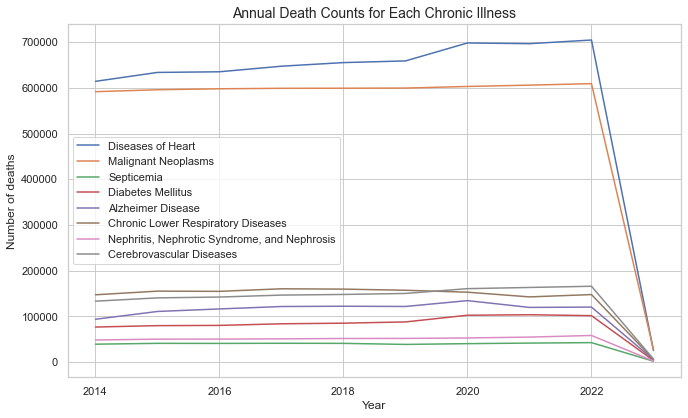

In [15]:
# # Plot the annual death counts for selected chronic illnesses (absolute)

deaths_per_year.plot( y = chronic_illnesses, figsize = (11,6.5))
plt.title("Annual Death Counts for Each Chronic Illness", fontsize= 14)
plt.ylabel("Number of deaths");

plt.savefig('Figures/Annual_Count_For_Chronic_Illnesses.png', dpi=300, bbox_inches='tight')

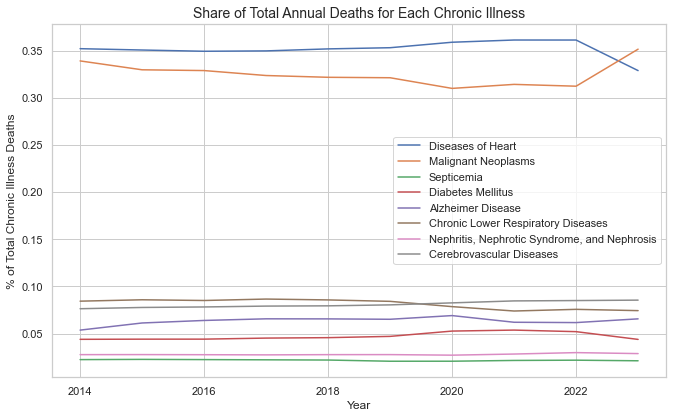

In [27]:
# Plot the annual death counts for selected chronic illnesses (ratio of all selected chronic illnesses)

share_in_deaths = deaths_per_year.divide(deaths_per_year["Total"], axis = 0)
share_in_deaths.plot(y = chronic_illnesses, figsize = (11,6.5)); 
plt.title("Share of Total Annual Deaths for Each Chronic Illness", fontsize= 14)
plt.ylabel("% of Total Chronic Illness Deaths")

plt.savefig('Figures/Share_of_Total_Annual_Deaths_Chronic_Illnesses.png', dpi=300, bbox_inches='tight')

## Summary:

For our analysis, we would focus our efforts on these top two chronic illnesses:

1. Diseases of Heart: From the selected chronic illnesses, this illness is the largest cause of death, as of 2022, and the share of deaths caused by this illness has been increasing over recent years.

2. Cerebrovascular Diseases: As of 2022, this illness is the third largest cause of death, and the share of deaths caused by this illness has been increasing over recent years.


## 3b. Analysis: Should we adjust our marketing plan to account for seasonality?

In [17]:
# Aggregating deaths per month
deaths_per_month = data.groupby(['Year', 'Month'])[chronic_illnesses].sum()

# Create total column
total_deaths_per_month = deaths_per_month.sum(axis = 1) 
deaths_per_month["Total"] = total_deaths_per_month

deaths_per_month.head(9)

Diseases of Heart  Malignant Neoplasms  Septicemia  \
Year Month                                                       
2014 1                  58229                51101        3944   
     2                  50435                45558        3214   
     3                  54347                50646        3451   
     4                  50954                48304        3125   
     5                  50810                49497        3105   
     6                  47144                48103        2947   
     7                  47991                49259        3112   
     8                  47109                49519        2931   
     9                  46909                48331        2918   

            Diabetes Mellitus  Alzheimer Disease  \
Year Month                                         
2014 1                   7344               8305   
     2                   6443               7315   
     3                   6738               7999   
     4                   6343               7117   
     5                   6272               7266   
     6                   5802               6755   
     7                   5983               6990   
     8                   5930               6986   
     9                   5810               7238   

            Chronic Lower Respiratory Diseases  \
Year Month                                       
2014 1                                   15078   
     2                                   12747   
     3                                   13493   
     4                                   12573   
     5                                   12281   
     6                                   11207   
     7                                   11161   
     8                                   10722   
     9                                   10426   

            Nephritis, Nephrotic Syndrome, and Nephrosis  \
Year Month                                                 
2014 1                                              4600   
     2                                              4064   
     3                                              4300   
     4                                              3902   
     5                                              3980   
     6                                              3631   
     7                                              3690   
     8                                              3778   
     9                                              3823   

            Cerebrovascular Diseases   Total  
Year Month                                    
2014 1                         12074  160675  
     2                         10780  140556  
     3                         11395  152369  
     4                         10773  143091  
     5                         10963  144174  
     6                          9973  135562  
     7                         10449  138635  
     8                         10369  137344  
     9                         10513  135968

### Standardizing Average Monthly Death Counts

In [18]:
# Setting up analysis of annual averages and standardization
newdata = data.copy()
newdata.drop(columns = ["Septicemia", "Diabetes Mellitus", "Alzheimer Disease", "Malignant Neoplasms", "Chronic Lower Respiratory Diseases","Nephritis, Nephrotic Syndrome, and Nephrosis", "COVID-19 (Multiple Cause of Death)", "COVID-19 (Underlying Cause of Death)", "Total", "Total w/o Covid"], inplace = True)
newdata["Year"] = newdata["Year"].astype(int)
newdata["Month"] = newdata["Month"].astype(int)
year_avg = newdata.groupby(["Year"]).mean()
year_avg.drop(columns = "Month", inplace = True)

year_stddev = newdata.groupby(["Year"]).std()
year_stddev.drop(columns = "Month", inplace = True)
year_stddev

,Diseases of Heart,Cerebrovascular Diseases
Year,,
2014,3924.971785,786.695327
2015,4342.436996,794.195472
2016,3531.233350,756.379755
2017,4228.447063,839.966174
2018,4871.508250,926.674357
2019,3479.801391,734.980081
2020,3450.955374,781.984926
2021,3680.866658,776.303181
2022,5237.997185,1016.731260


In [19]:
by_year = newdata.reindex()
by_year.set_index(["Year", "Month"], inplace=True)
by_year

Diseases of Heart  Cerebrovascular Diseases
Year Month                                             
2014 1                  58229                     12074
2015 1                  63190                     13576
2016 1                  58049                     12968
2017 1                  61650                     13595
2018 1                  67024                     14653
...                       ...                       ...
2022 9                  54011                     12964
     10                 57760                     13908
     11                 59255                     13907
     12                 66795                     15055
2023 9                  25048                      6505

[109 rows x 2 columns]

/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/Users/dameducharme/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


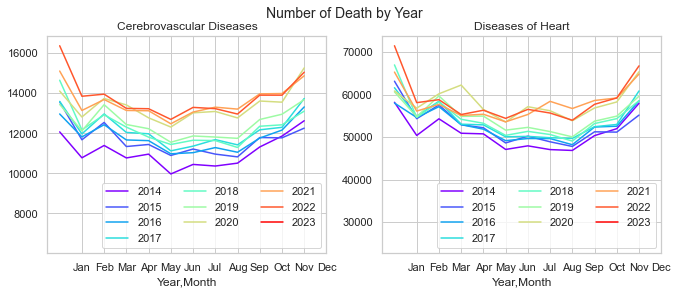

In [20]:
import calendar

fig2 = plt.figure(figsize=(11, 4))
fig2.suptitle("Number of Death by Year", fontsize=14)

fig2_ax1 = fig2.add_subplot(1, 2, 1)
fig2_ax2 = fig2.add_subplot(1, 2, 2)

# Graph 1
years_data = by_year["Cerebrovascular Diseases"].groupby(level=0)
colors = [plt.cm.rainbow(i) for i in np.linspace(0, 1, len(years_data))]
for (year, group), color in zip(years_data, colors):
    group.plot(ax=fig2_ax1, color=color, label=year)
fig2_ax1.set_xticks(group.index.levels[1])
fig2_ax1.set_xticklabels([calendar.month_abbr[month] for month in group.index.levels[1]])
fig2_ax1.set_title("Cerebrovascular Diseases")
fig2_ax1.legend(ncol=3)

# Graph 2
years_data = by_year["Diseases of Heart"].groupby(level=0)
colors = [plt.cm.rainbow(i) for i in np.linspace(0, 1, len(years_data))]
for (year, group), color in zip(years_data, colors):
    group.plot(ax=fig2_ax2, color=color, label=year)
fig2_ax2.set_xticks(group.index.levels[1])
fig2_ax2.set_xticklabels([calendar.month_abbr[month] for month in group.index.levels[1]])
fig2_ax2.set_title("Diseases of Heart")
fig2_ax2.legend(ncol=3)
fig2.savefig('Figures/Line_Chart_Seasonality_by_Year.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

In [21]:
# Create a copy of the original dataset to store the averaged data
averages = newdata.copy()

# Determine the number of columns and rows in the 'year_avg' DataFrame
column_count = year_avg.shape[1]
year_count = year_avg.shape[0]

# Initialize column index for looping
k = 0

# Loop through each column in the 'year_avg' DataFrame
while k < column_count:
    # Start year for the inner loop
    y = 2014
    # Extract the column name based on current index 'k'
    name = year_avg.columns.values[k]
    
    # Loop through each year from 2014 to 2022
    while y < 2023:
        # Get the average value for the current year and column
        mu = year_avg.loc[y, name]
        
        # The below line, though commented, provides an alternate way to achieve the same result as the subsequent line
        #ratios[name] = np.where(ratios["Year"] == y, mu)
        
        # For each matching year in 'averages' DataFrame, update the respective column with the average value
        averages.loc[averages["Year"] == y, name] = mu.astype(int)
        
        # Move to the next year
        y = y + 1
    
    # Move to the next column
    k = k + 1
averages

,Year,Month,Diseases of Heart,Cerebrovascular Diseases
0,2014,1,51195,11091
1,2015,1,52820,11693
2,2016,1,52938,11845
3,2017,1,53954,12198
4,2018,1,54615,12317
...,...,...,...,...
104,2022,9,58732,13810
105,2022,10,58732,13810
106,2022,11,58732,13810
107,2022,12,58732,13810


In [22]:
# Create a deep copy of the original dataset to store the standard deviation data.
# Deep copy ensures that changes to 'deviations' do not affect the original 'newdata' DataFrame.
deviations = newdata.copy(deep=True)

# Determine the number of columns and rows in the 'year_stddev' DataFrame.
column_count = year_stddev.shape[1]
year_count = year_stddev.shape[0]

# Initialize column index for looping.
k = 0

# Loop through each column in the 'year_stddev' DataFrame.
while k < column_count:
    # Start year for the inner loop.
    y = 2014
    
    # Extract the column name based on the current index 'k'.
    name = year_stddev.columns.values[k]
    
    # Loop through each year from 2014 to 2022.
    while y < 2023:
        # Get the standard deviation value for the current year and column.
        sdev = year_stddev.loc[y, name]
        
        # For each matching year in the 'deviations' DataFrame, 
        # update the respective column with the standard deviation value.
        deviations.loc[deviations["Year"] == y, name] = sdev.astype(int)
        
        # Move to the next year.
        y = y + 1
    
    # Move to the next column.
    k = k + 1
deviations

,Year,Month,Diseases of Heart,Cerebrovascular Diseases
0,2014,1,3924,786
1,2015,1,4342,794
2,2016,1,3531,756
3,2017,1,4228,839
4,2018,1,4871,926
...,...,...,...,...
104,2022,9,5237,1016
105,2022,10,5237,1016
106,2022,11,5237,1016
107,2022,12,5237,1016


In [23]:
# Calculate the standardized spread by subtracting 'averages' from 'newdata' 
# and then dividing by 'deviations'. This provides a measure of how many standard deviations 
# each data point deviates from the average.
standard_spread = (newdata.sub(averages)).div(deviations)

# Copy the 'Year' and 'Month' columns from 'averages' to 'standard_spread'.
standard_spread["Year"] = averages["Year"]
standard_spread["Month"] = averages["Month"]

# Convert the 'Year' and 'Month' columns to string data type.
standard_spread["Year"] = standard_spread["Year"].astype(str)
standard_spread["Month"] = standard_spread["Month"].astype(str)

# Combine 'Year' and 'Month' to create a 'date' column in the format "Year Month".
standard_spread["date"] = standard_spread["Year"] + " " + standard_spread["Month"]

# Convert the 'date' column strings to datetime objects using the specified format.
standard_spread.date = standard_spread["date"].map(lambda x: datetime.strptime(x,"%Y %m"))

# Sort the 'standard_spread' DataFrame based on the 'date' column.
standard_spread = standard_spread.sort_values(by="date")

# Set the 'date' column as the index for the 'standard_spread' DataFrame.
standard_spread = standard_spread.set_index(["date"])

# Display the 'standard_spread' DataFrame with the new updates.
standard_spread

,Year,Month,Diseases of Heart,Cerebrovascular Diseases
date,,,,
2014-01-01,2014,1,1.792559,1.250636
2014-02-01,2014,2,-0.193680,-0.395674
2014-03-01,2014,3,0.803262,0.386768
2014-04-01,2014,4,-0.061417,-0.404580
2014-05-01,2014,5,-0.098114,-0.162850
...,...,...,...,...
2022-09-01,2022,9,-0.901470,-0.832677
2022-10-01,2022,10,-0.185602,0.096457
2022-11-01,2022,11,0.099866,0.095472


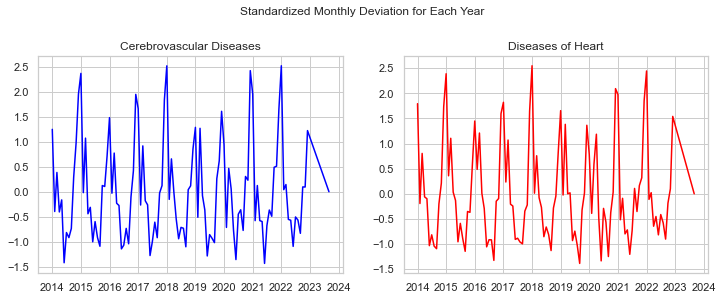

In [24]:
# Create a new figure with specified dimensions (12 by 4 inches).
fig1 = plt.figure(figsize=(12, 4))

# Set a title for the entire figure.
fig1.suptitle("Standardized Monthly Deviation for Each Year", fontsize=12, y=1.05)

# Create the first subplot (ax1) 
fig1_ax1 = fig1.add_subplot(1, 2, 1)

# Create the second subplot (ax2)
fig1_ax2 = fig1.add_subplot(1, 2, 2)

# Graph 1
# Plot the standardized data for "Cerebrovascular Diseases" on ax1.
fig1_ax1.plot(standard_spread["Cerebrovascular Diseases"], c="blue")
# Set the title for this subplot.
fig1_ax1.set_title("Cerebrovascular Diseases")

# Graph 2
# Plot the standardized data for "Diseases of Heart" on ax2.
fig1_ax2.plot(standard_spread["Diseases of Heart"], c="red")
# Set the title for this subplot.
fig1_ax2.set_title("Diseases of Heart")

# Save the figure to a file in the "Figures" folder.
fig1.savefig('Figures/Seasonality.png', dpi=300, bbox_inches='tight')

### Summary:
There is certainly seasonality to justify specific marketing for winter seasons.

## 3c. Analysis: Since the onset of Covid-19, have there been any significant shifts in death trends regarding the top three chronic illness?

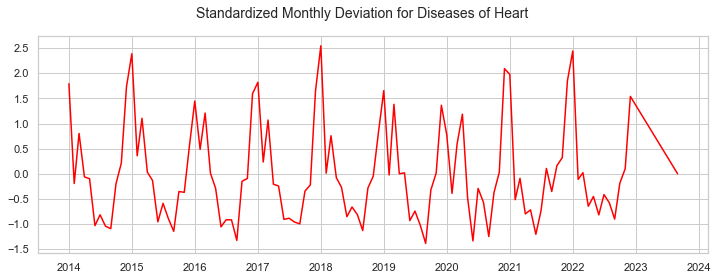

In [25]:
# Initialize a new figure with specified dimensions (12 by 4 inches).
fig1b = plt.figure(figsize=(12, 4))

# Set a title for the figure.
fig1b.suptitle("Standardized Monthly Deviation for Diseases of Heart", fontsize=14)

# Add a subplot to the figure.
ax = fig1b.add_subplot()

# Plot the standardized data for "Diseases of Heart" with a red color.
ax.plot(standard_spread["Diseases of Heart"], c="red")

# Save the figure to a file in the "Figures" folder.
plt.savefig('Figures/Standardized_Monthly_Deviation_Diseases_of_Heart', dpi=300, bbox_inches='tight')

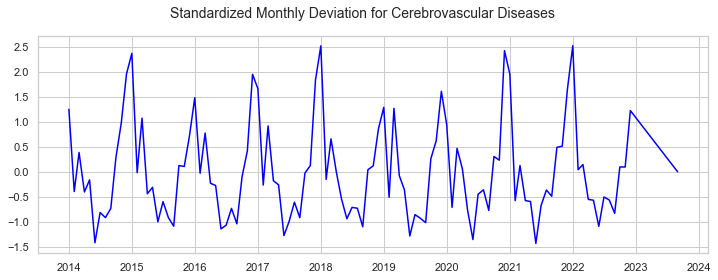

In [26]:
# Initialize a new figure with specified dimensions (12 by 4 inches).
fig1b = plt.figure(figsize=(12, 4))

# Set a title for the figure.
fig1b.suptitle("Standardized Monthly Deviation for Cerebrovascular Diseases", fontsize=14)

# Add a subplot to the figure.
ax = fig1b.add_subplot()

# Plot the standardized data for "Cerebrovascular Diseases" with a blue color.
ax.plot(standard_spread["Cerebrovascular Diseases"], c="blue")

# Save the figure to a file in the "Figures" folder.
plt.savefig('Figures/Standardized_Monthly_Deviation_Cerebrovascular_Diseases', dpi=300, bbox_inches='tight')